In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

In [2]:

# Our libraries
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *

# some initial setup
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)



ModuleNotFoundError: No module named 'bcolz'

In [ ]:
# DATA_DIR = "D:/datasets/catsvsdogs/"
# DATA_DIR = "D:/datasets/catsvsdogs/dev/"
DATA_DIR = 'C:/Users/Mina/Myproject/Neural_Network/production/dev/'
sz = 224
batch_size = 16

os.listdir(DATA_DIR)

In [ ]:
trn_dir = f'{DATA_DIR}train'
val_dir = f'{DATA_DIR}valid'

In [ ]:

trn_fnames = glob.glob(f'{trn_dir}/*/*.jpg')
trn_fnames[:5]


879


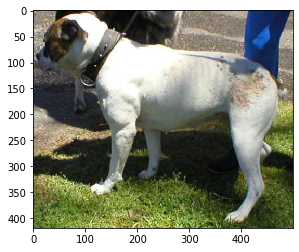

In [9]:
img = plt.imread(trn_fnames[550])
plt.imshow(img)
print(len(trn_fnames))

In [10]:
train_ds = datasets.ImageFolder(trn_dir)

In [11]:
train_ds.classes

['cat', 'dog']

In [ ]:
train_ds.class_to_idx
train_ds.root

In [12]:
train_ds.imgs
type(train_ds.transform)

[('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\0.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\1.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\100.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\101.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\102.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\103.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\104.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\108.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\109.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\110.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\111.jpg',
  0),
 ('C:/Users/Mina/Myproject/Neural_Network/production/dev/train\\cat\\

In [14]:
tfms = transforms.Compose([
    transforms.Resize((sz, sz)),  # PIL Image
    transforms.ToTensor(),        # Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder(trn_dir, transform=tfms)
valid_ds = datasets.ImageFolder(val_dir, transform=tfms)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Mina/Myproject/Neural_Network/production/dev/valid'